In [ ]:
'''
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

'''

import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
upload=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [ ]:
data=pd.read_csv("50_Startups.csv")
data[0:5]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data=data.rename({"R&D Spend":"rds","Administration":'administration',"Marketing Spend":"marketing_spend","State":"state","Profit":"profit"},axis=1)
data[0:5]

,rds,administration,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.corr()

,rds,administration,marketing_spend,profit
rds,1.000000,0.241955,0.724248,0.972900
administration,0.241955,1.000000,-0.032154,0.200717
marketing_spend,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


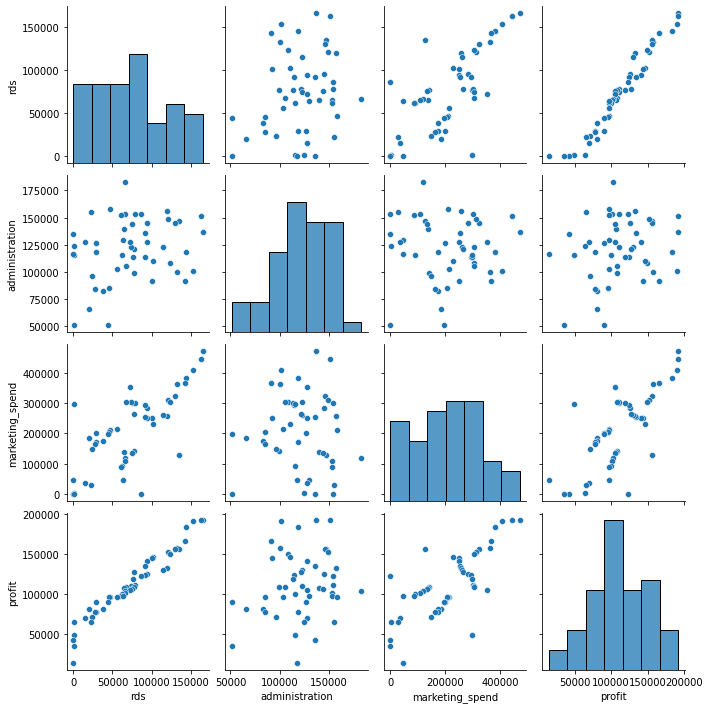

In [ ]:
import seaborn as sns
sns.pairplot(data)

In [ ]:
#creating model
import statsmodels.formula.api as smf
model=smf.ols('profit~rds +	administration + marketing_spend',data=data).fit()

In [ ]:
model.params

Intercept          50122.192990
rds                    0.805715
administration        -0.026816
marketing_spend        0.027228
dtype: float64

In [ ]:
#t value and p value
np.round(model.pvalues,5)
#as administration and marketing values are less than 0.05 , we will create separate model for them and check p values

Intercept          0.00000
rds                0.00000
administration     0.60176
marketing_spend    0.10472
dtype: float64

In [ ]:
model.tvalues

Intercept           7.626218
rds                17.846374
administration     -0.525507
marketing_spend     1.655077
dtype: float64

In [ ]:
model.rsquared, model.rsquared_adj #accuray of model is 94%

(0.9507459940683246, 0.9475337762901719)

In [ ]:
#checking p value corelated variable
model1=smf.ols('profit~administration',data=data).fit()
np.round(model1.pvalues,5)

Intercept         0.00382
administration    0.16222
dtype: float64

In [ ]:
model2=smf.ols('profit~marketing_spend',data=data).fit()
model2.pvalues

Intercept          4.294735e-10
marketing_spend    4.381073e-10
dtype: float64

In [ ]:
model3=smf.ols('profit~marketing_spend + administration',data=data).fit()
np.round(model3.pvalues,5) # both are significant hence final model should contain the marteing as well administration

Intercept          0.25893
marketing_spend    0.00000
administration     0.01729
dtype: float64

In [ ]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_rds=smf.ols("rds~administration+marketing_spend",data=data).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_adms=smf.ols("administration~rds+marketing_spend",data=data).fit().rsquared
vif_adms=1/(1-rsq_adms)

rsq_ms=smf.ols("marketing_spend~rds+administration",data=data).fit().rsquared
vif_ms=1/(1-rsq_ms)


In [ ]:
df=pd.DataFrame({'column':["rds","administration","marketing_spend"],'VIF':[vif_rds,vif_adms,vif_ms]})
df
# as no vif is greater than 20, so no colinearity hence cnsider all comuns in final model

,column,VIF
0,rds,2.468903
1,administration,1.175091
2,marketing_spend,2.326773


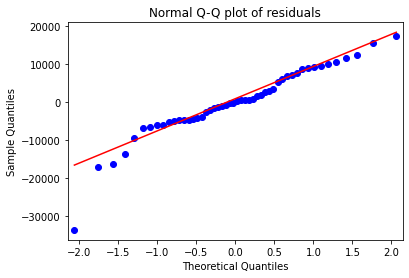

In [ ]:
#Residual(error) Analysis:

import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
#normalization function
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

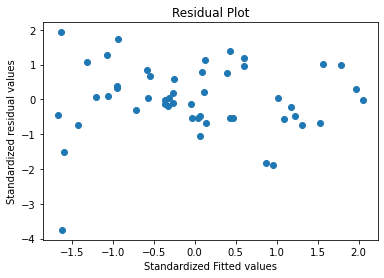

In [ ]:
#plotting resid vs fittedvalues , plot shoud not follow any pattern
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

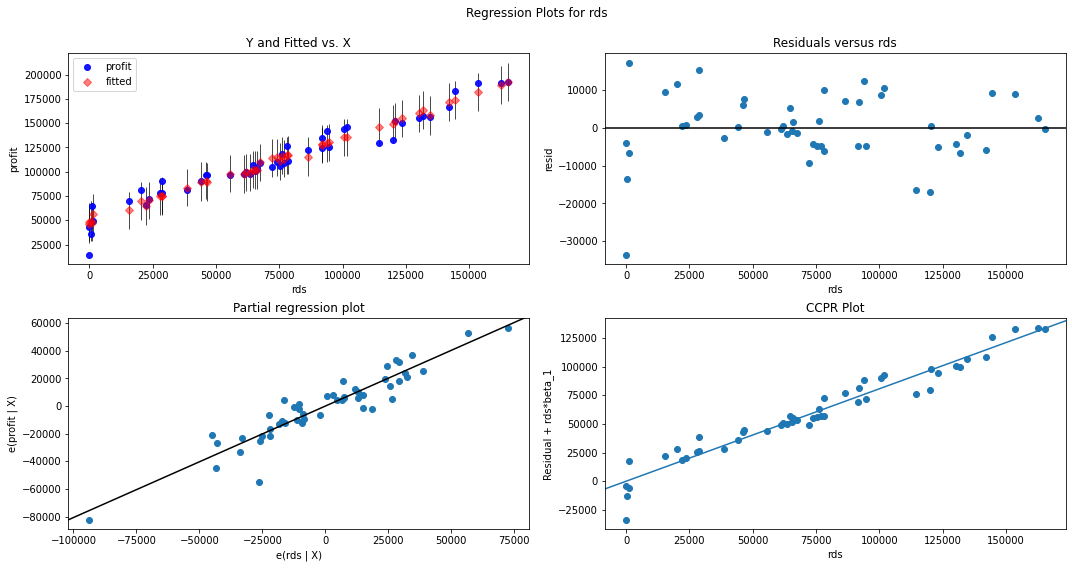

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "rds", fig=fig)
plt.show()

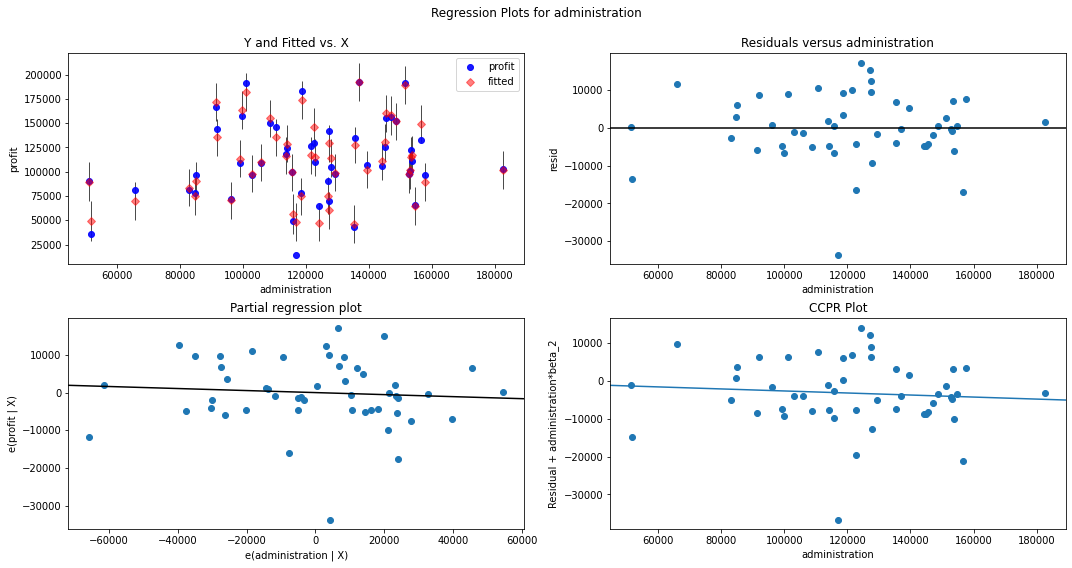

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "administration", fig=fig)
plt.show()

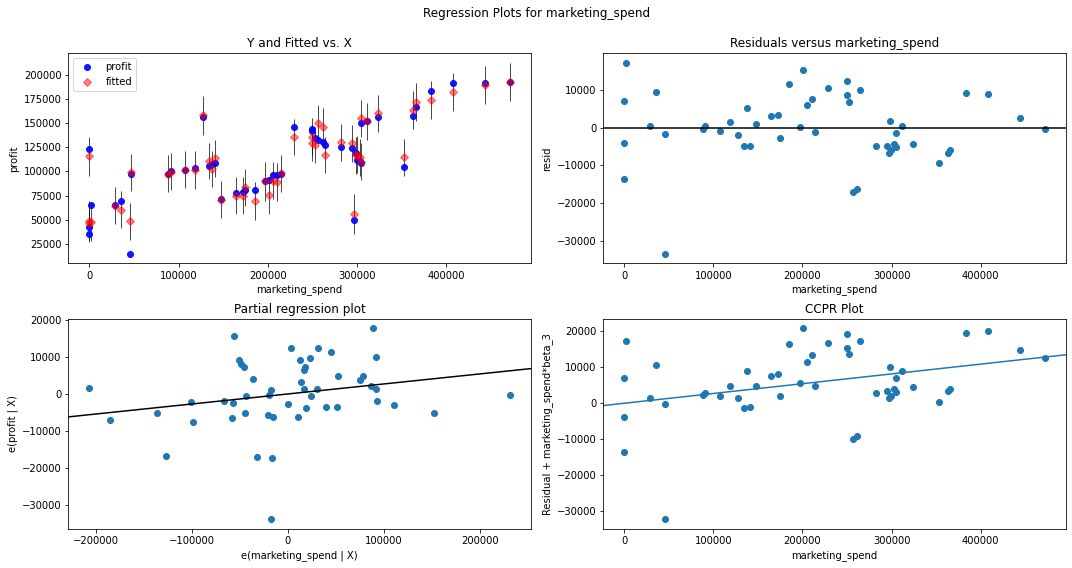

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "marketing_spend", fig=fig)
plt.show()

In [ ]:
#cooks distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-65-47cc5ff6c0cd>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data)), np.round(c, 3))


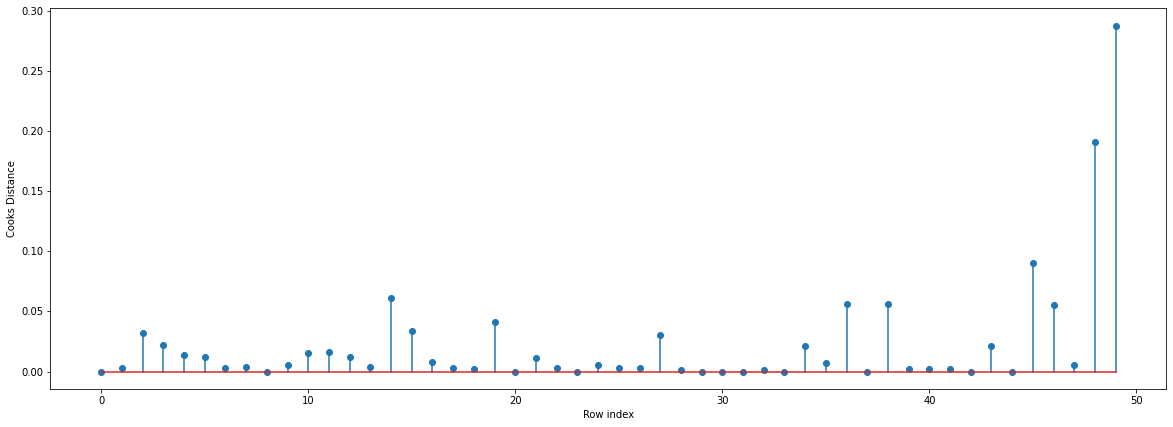

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer/outlier where np.max(c) >0.5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

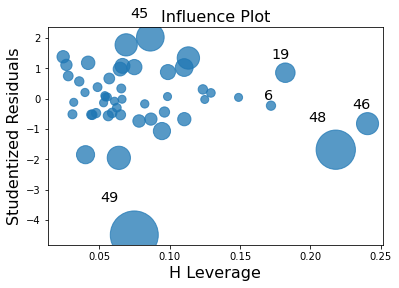

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [ ]:
data[data.index.isin([49])] 


,rds,administration,marketing_spend,state,profit
49,0.0,116983.8,45173.06,California,14681.4


In [ ]:
#improving the model
#Discard the data points which are influencers and reasign the row number (reset_index())
data1=data.drop(data.index[49],axis=0).reset_index()

data1

,index,rds,administration,marketing_spend,state,profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
#rebuilding model with new data
model_new=smf.ols("profit~rds+administration+marketing_spend",data=data1).fit()

#cooks distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

#index and value of influencer/outlier where c is more than .5
(np.argmax(c),np.max(c))

#as np.max(c)<0.5 we should stop dignostic process and finalize the model

(49, 0.2880822927543272)

In [ ]:
model_new.rsquared


0.9613162435129848

In [ ]:
#table containing R^2 value for each prepared model

df1={'Prep_Models':['Model','New_Model'],'Rsquared':[model.rsquared,model_new.rsquared]}
pd.DataFrame(df1)



,Prep_Models,Rsquared
0,Model,0.950746
1,New_Model,0.961316
